<a href="https://colab.research.google.com/github/Mxs8513/mxs8513.github.io/blob/main/DeepLPrjct2_MNIST_Digit_classification_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import os
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [119]:
#Loading the MNIST dta from keras.dtasets

In [120]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # will lead you with 4 arrays in mnist data

In [121]:
type( x_train) # image has alr been converted to numpy array

numpy.ndarray

In [122]:
# Shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
#x_train contains 60000 images
# all images are grayscale
#labels have been stored in y train
#x_test has 10000 testing images
# 28 by 28 is the dimension size og photo

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [123]:
# printing the 10th image
print(x_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [124]:
print(x_train[10].shape)

(28, 28)


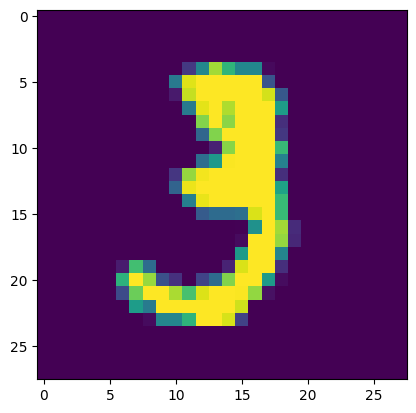

3


In [125]:
#displaying the image
plt.imshow(x_train[10])
plt.show()


# printing the corresponding label
print(y_train[10])



ImageLabels

In [126]:
print(y_train.shape, y_test.shape)
#images and labels

(60000,) (10000,)


In [127]:
#unique values in y_train
print(np.unique(y_train))


#unique values in y_test
print(np.unique(y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [128]:
#We can use these labels as such or we can aslo apply one hot encode

All the images have the same dimensions in this dta set if not we have to resize all these images to a common dimension


In [129]:
# scaling the values


x_train = x_train/255
x_test = x_test/255
# 255 maximum that can be used in thsi dta
#The main use of this is to get all the values to be placed between 0 and 1


In [130]:
#printing the 10th image

print(x_train[10])

# all teh values are between 0 and 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the
 Neural Network

In [131]:
# setting up the layers of the neural network

model = keras.Sequential([

                          keras.layers.Flatten(input_shape=(28,28)), # converts matrix into single dimension array
                          keras.layers.Dense(50, activation='relu'), # activation method
                          keras.layers.Dense(10, activation='sigmoid')
                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [132]:
# compiling the Neural Network

model.compile(optimizer='adam', # improves accuracy by closing down the metrics
              loss = 'sparse_categorical_crossentropy' ,
              metrics=['accuracy']) # num of correct predictions/ total number of data points



Accuracy on Training dta

In [ ]:
# training the Neural Network

model.fit(x_train, y_train, epochs = 10) #epochs is how many times your neural network should go through the dta


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8584 - loss: 0.5161
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9503 - loss: 0.1702
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1239
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9709 - loss: 0.0984
Epoch 5/10


In [ ]:
# time each neural netwrok took to go through
#loss function -- the distance between true value and predicted value
# if loss function model is high that means model is not working properly
# minimize the loss function


# The neural network takes these certain dta points, runs through them and end goal is to increase the accuracy score and
#decrease the loss function

# Training dta accuracy -- 98.9%




Accuracy on test dta

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test) # model wil get predictions from x_tst and compare them to true labels in y_test
print(accuracy)


# Test dta accuracy ------ 96.63%



In [ ]:
print(x_test.shape)
# test dta contains 10000 images


In [ ]:
# firsdt dta point in x_tst
plt.imshow(x_test[0])

In [ ]:
print(y_test[0])

In [ ]:
y_pred = model.predict(x_test) # All the 10000 labels will be stored in this ypred which is the prediciton value

print(y_pred.shape)

print(y_pred[0])


# 1st value -- what is the probability the value will be 0
# 2nd value --- what is the probability the value will be 1
#......

model.predict() gives the prediction probability of each class (0 to 9) for that particulat dta point

In [ ]:
# converting the prediction probs to class labels

label_for_first_image = np.argmax(y_pred[0]) # what is the index of value that is max
print(label_for_first_image)


# The value in index 7 is the max value




Converting prediction probs to class label for all tst dta points


In [ ]:
y_pred_labels = [np.argmax(i) for i in y_pred] # When the formula prints for the first tiem it wil take the first value in y_pred
print(y_pred_labels)


# all prediction will be conv, to labels

In [ ]:
print(y_pred)
# The numpy arrays have been converted to whole number clasess

In [ ]:
#y_test --- True Labels
# y_pred_labels --- Predicted Labels

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [ ]:
print(conf_mat)

In [ ]:
plt.figure(figsize = (15,7)) # width and height

sns.heatmap(conf_mat, annot=True, fmt='d', cmap = 'Oranges')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')


#960 means 960 zero images have been correctly been predicted to 0

#What is the correct prediction played by our mdoel

# The diagonal on this scale means correct values and the rest are incorrect values



Building a Predictive System

In [ ]:
input_image_path = '/content/MNIST_digit.png'


input_image = cv2.imread(input_image_path)


In [ ]:
type(input_image)

In [ ]:
input_image.shape
# This has been read in the form of an RGB image
# convert to grayscale

In [ ]:
print(input_image)

In [ ]:
cv2_imshow(input_image)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
#converting RGB to grayscale


In [ ]:
grayscale.shape
#conversion is succesfull


In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape
#The size changed from 298 by 300 to 28 by 28

In [ ]:
cv2_imshow(input_image_resize)


In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshape = np.reshape(input_image_resize, [1, 28, 28])
# this basically means I am going to predict oneimage and the dimension of this is 28 x 28

In [ ]:
input_prediction = model.predict(image_reshape)
print(input_prediction)

In [ ]:
input_print_label = np.argmax(input_prediction)


In [ ]:
print(input_print_label)

Preidctive system

In [ ]:
input_image_path = input('Enter your image path: ')


input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)





input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshape = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshape)

input_print_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognized as ', input_print_label)